In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("energy_data.csv")
df.head()

,Household,Month,Consumption_kWh
0,House_1,Month_1,324.84
1,House_1,Month_2,293.09
2,House_1,Month_3,332.38
3,House_1,Month_4,376.15
4,House_1,Month_5,288.29


In [23]:
df_pivot=df.pivot_table(values="Consumption_kWh", columns="Month", index="Household")
df_pivot

,Consumption_kWh
Month,
Month_1,304.7617
Month_10,294.6531
Month_11,297.6350
Month_12,302.1096
Month_2,295.0924
Month_3,300.2722
Month_4,304.2905
Month_5,300.7942
Month_6,312.3304


In [36]:
df_pivot_mean = df.pivot_table(values="Consumption_kWh", index="Household", aggfunc="mean").sort_values(by = "Consumption_kWh", ascending = False)
df_pivot_mean

,Consumption_kWh
Household,
House_75,331.929167
House_69,329.987500
House_98,328.775000
House_18,328.486667
House_84,328.326667
...,...
House_44,279.202500
House_29,278.197500
House_54,277.551667


In [38]:
print("Top five:")
df_pivot_mean.head()

Top five:


,Consumption_kWh
Household,
House_75,331.929167
House_69,329.987500
House_98,328.775000
House_18,328.486667
House_84,328.326667


In [56]:
avg_month = df.groupby("Month")["Consumption_kWh"].mean().reset_index()
avg_month = avg_month.rename(columns={"Consumption_kWh" :"Avg"})
avg_month

,Month,Avg
0,Month_1,304.7617
1,Month_10,294.6531
2,Month_11,297.6350
3,Month_12,302.1096
4,Month_2,295.0924
5,Month_3,300.2722
6,Month_4,304.2905
7,Month_5,300.7942
8,Month_6,312.3304
9,Month_7,310.2155


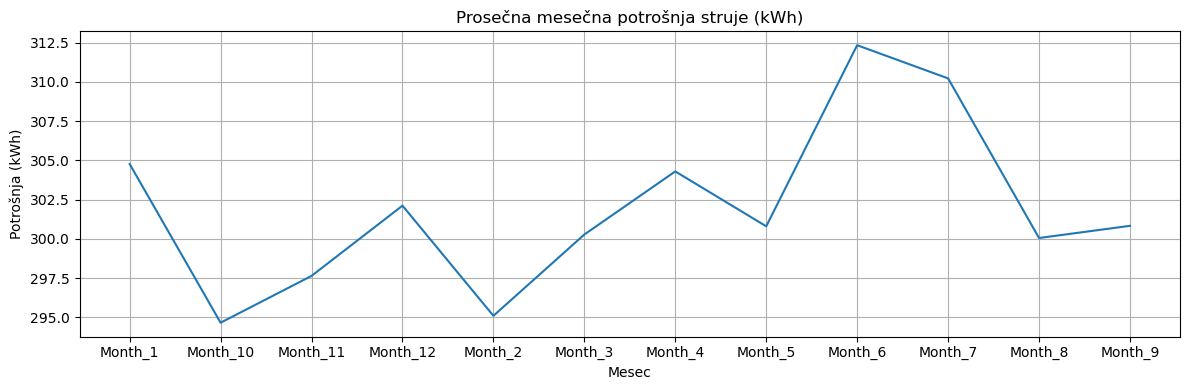

In [57]:
plt.figure(figsize=(12,4))
plt.plot(avg_month["Month"], avg_month["Avg"])
plt.title("Prosečna mesečna potrošnja struje (kWh)")
plt.xlabel("Mesec")
plt.ylabel("Potrošnja (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()

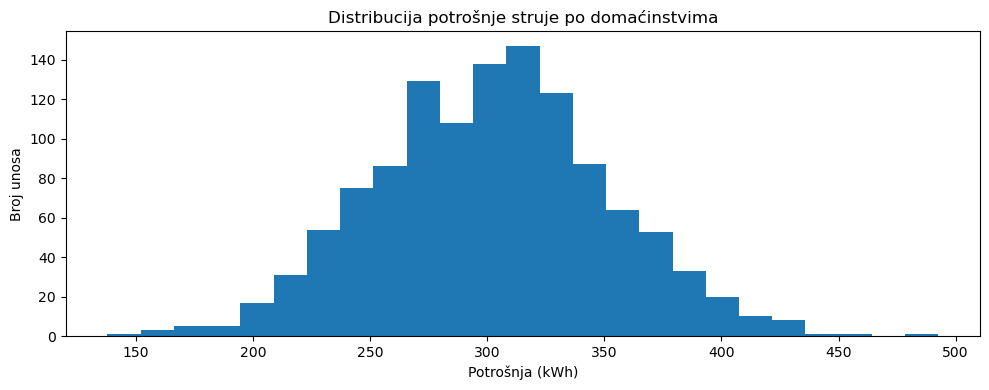

In [62]:
plt.figure(figsize=(10,4))
plt.hist(df["Consumption_kWh"], bins=25)
plt.title("Distribucija potrošnje struje po domaćinstvima")
plt.xlabel("Potrošnja (kWh)")
plt.ylabel("Broj unosa")
plt.tight_layout()
plt.show()